The dataset we will be using is the Top Spotify Songs dataset from Kaggle found at https://www.kaggle.com/datasets/arnavvvvv/spotify-music?resource=download

We will begin preparing our dataset by doing the following steps:

- Preprocessing stap 1 Dimensie en beschrijvende statistieken van de dataset analyseren (shape, describe).
- Preprocessing stap 2 Lege/null waarden aanvullen of verwijderen.
- Preprocessing stap 3 Foutieve data en uitschieters verwijderen.
- Preprocessing stap 4 One-hot-encoding toepassen waar nodig.


- Plot 1 Heatmap om verbanden vast te stellen
- Plot 2 Scatterplot van populariteit per maand en-/of dag van release
- Plot 3 Histplot van populariteit per artiest/lied
- Plot 4 Scatterplot van populariteit van artiest op Spotify tegenover Apple

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

Preprocessing

Stap 1: Dimensie en bescrhijvende statistieken van de dataset analyseren (shape, describe)

In [19]:
# dataset inlezen
dataset = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1') # encoding='latin-1' toegevoegd om error te voorkomen
dataset.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"['Latto', 'Jung Kook']",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,['Myke Towers'],1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,['Olivia Rodrigo'],1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,['Taylor Swift'],1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,['Bad Bunny'],1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"['Dave', 'Central Cee']",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"['Eslabon Armado', 'Peso Pluma']",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,['Quevedo'],1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,['Gunna'],1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"['Peso Pluma', 'Yng Lvcas']",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [20]:
# hiermee krijgen we te zien hoeveel rijen en kolommen er in de dataset zitten
dataset.shape

(816, 24)

In [21]:
dataset.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [22]:
# Convert the 'streams' column to numeric values, and set errors='coerce' to replace non-numeric values with NaN
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')

# Drop the rows where 'streams' is NaN
dataset = dataset.dropna(subset=['streams'])

# Convert 'streams' back to int
dataset['streams'] = dataset['streams'].astype(np.int64)

# Remove negative values from 'streams'
dataset = dataset[dataset['streams'] > 0]

In [23]:
# dit geeft ons handige informatie over de dataset
dataset.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,2.454657,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,5.399650,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,2.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [24]:
dataset.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Stap 2: Lege/null waarden aanvullen of verwijderen.

In [25]:
# dropping the in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts column
# dataset.drop(['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts'], axis=1, inplace=True)

In [26]:
# dropping the rows that contain null values
dataset = dataset.replace('', np.nan)
dataset = dataset.dropna()

In [27]:
# Artist column should be list of artists instead of 1 long string
dataset['artist(s)_name'] = dataset['artist(s)_name'].str.split(',')
dataset['artist(s)_name'] = dataset['artist(s)_name'].apply(lambda x: [i.strip() for i in x])

Stap 3: Foutieve data en uitschieters verwijderen.

Stap 4: One-hot-encoding toepassen waar nodig.

In [28]:
# opslaan van de aangepaste dataset
dataset.to_csv('spotify_data.csv', index=False)

In [29]:
dataset.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[['Latto', 'Jung Kook']]",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,[['Myke Towers']],1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[['Olivia Rodrigo']],1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[['Taylor Swift']],1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[['Bad Bunny']],1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"[['Dave', 'Central Cee']]",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"[['Eslabon Armado', 'Peso Pluma']]",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,[['Quevedo']],1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,[['Gunna']],1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"[['Peso Pluma', 'Yng Lvcas']]",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


Plotten

Plot 1: Heatmap om verbanden vast te stellen

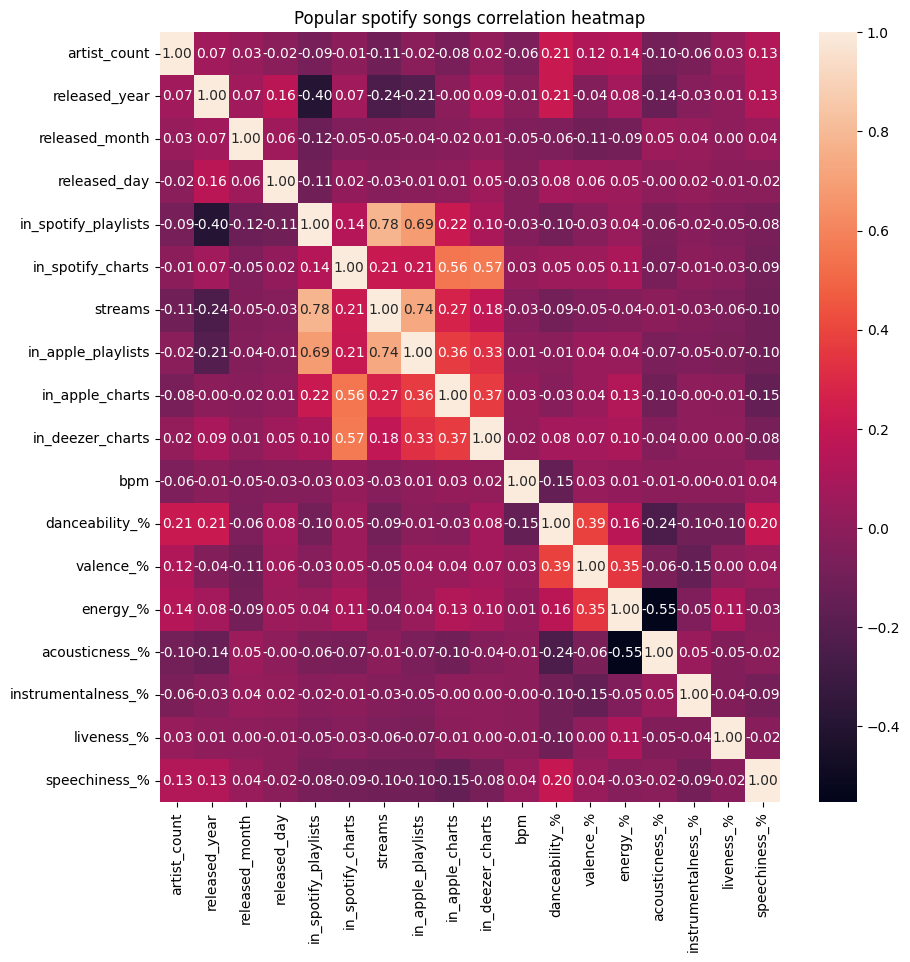

In [30]:
# om makkelijk verbanden te kunnen zien tussen de verschillende kolommen, maken we een heatmap
numerical_dataset = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(10,10))
sns.heatmap(numerical_dataset.corr(), annot=True, fmt=".2f")
plt.title("Popular spotify songs correlation heatmap")
plt.show()

Plot 2: Scatterplot van populariteit per maand en-/of dag van release

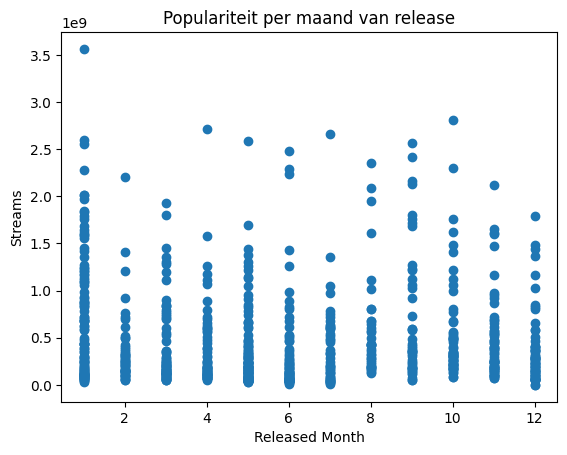

In [31]:
# een scatterplot om populariteit per maand van release te zien (populariteit is hier het aantal streams)
plt.scatter(dataset['released_month'], dataset['streams'])
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.title('Populariteit per maand van release')
plt.show()

Plot 3 Histplot van populariteit per artiest/lied

In [32]:
# Group by artist and sum the streams (artist is a list of artists, so we need to explode the list first)
filtered_dataset = dataset.explode('artist(s)_name')

# Remove possible empty strings from 'artist(s)_name'
filtered_dataset = filtered_dataset.replace('', np.nan)
filtered_dataset = filtered_dataset.dropna()

# Group by artist and sum the streams but only keep those 2 columns
filtered_dataset = filtered_dataset.groupby('artist(s)_name')['streams'].sum().reset_index()

# Sort the dataset by streams
filtered_dataset = filtered_dataset.sort_values(by='streams', ascending=False)

filtered_dataset.head(10)

,artist(s)_name,streams
743,['Taylor Swift'],11851151082
449,['Ed Sheeran'],11051252012
375,['Bad Bunny'],8582384095
39,'Bad Bunny'],6914376893
441,['Drake',6768602800
754,['The Weeknd',6344291869
456,['Eminem'],6183805596
755,['The Weeknd'],6038640754
482,['Harry Styles'],6033490512
374,['Bad Bunny',5365984835


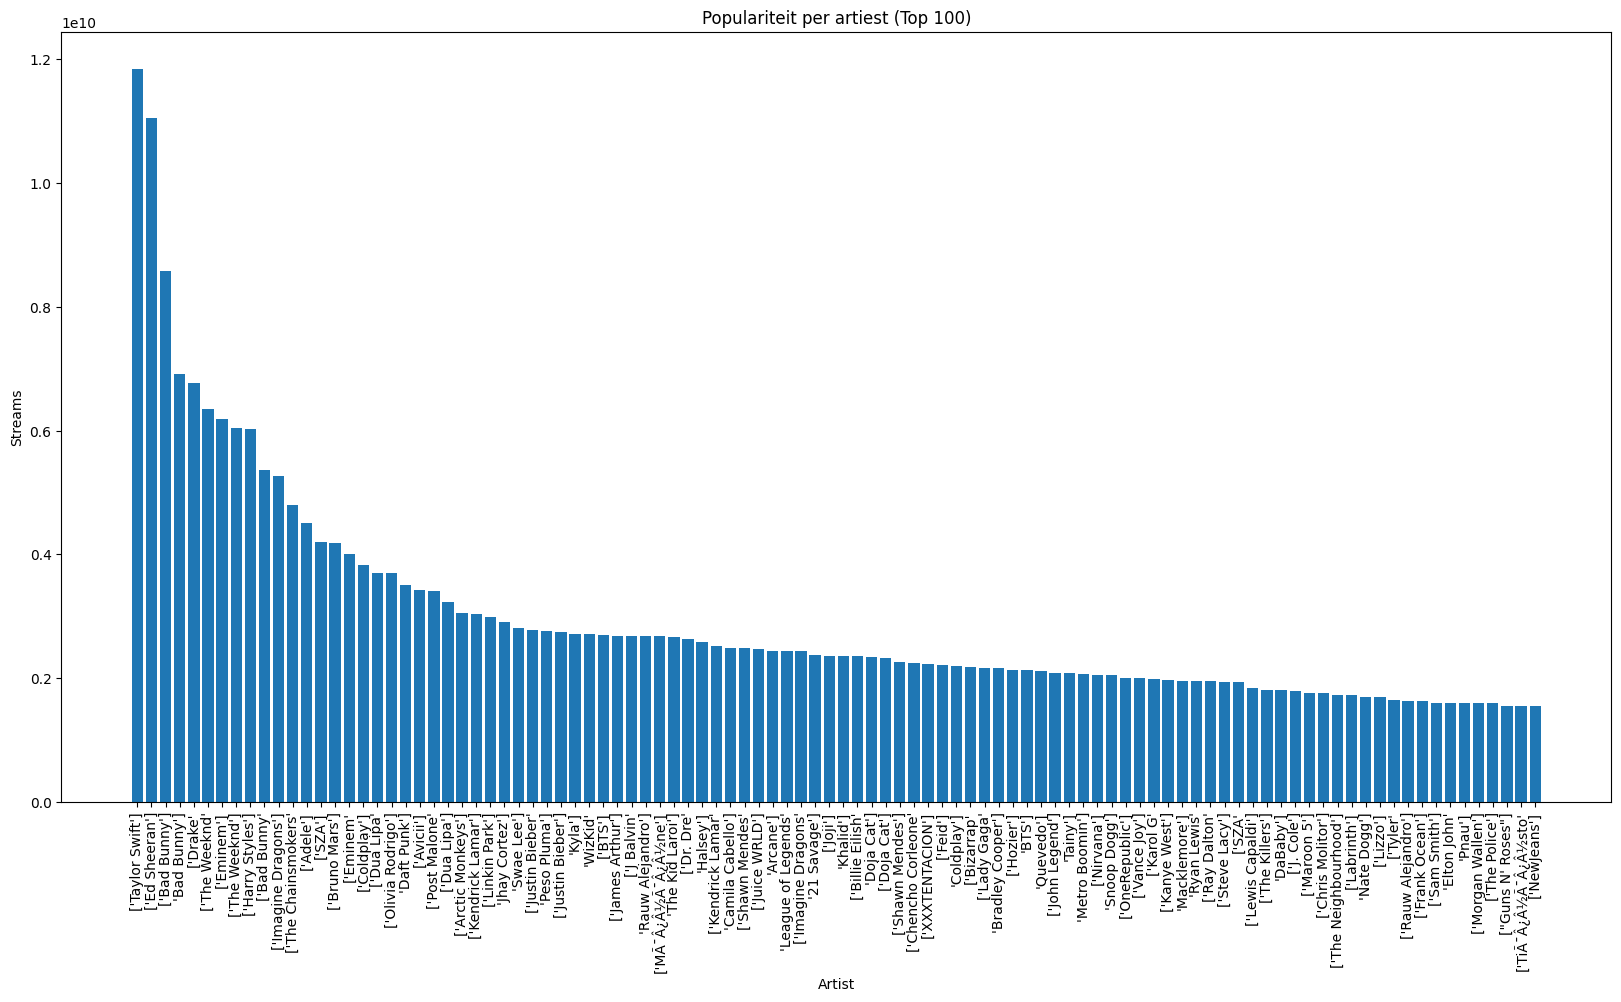

In [33]:
# Create the histogram
filtered_dataset_head = filtered_dataset.head(100)
plt.figure(figsize=(20,10))
plt.bar(filtered_dataset_head['artist(s)_name'], filtered_dataset_head['streams'])
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.title('Populariteit per artiest (Top 100)')
plt.show()

Plot 4 Scatterplot van populariteit van artiest op Spotify tegenover Apple

   danceability_%  valence_%   energy_%  acousticness_%  instrumentalness_%  \
0       74.546875  50.401042  67.609375       10.296875            0.447917   
1       62.446429  56.839286  46.160714       73.964286            0.875000   
2       72.979021  78.517483  77.083916        8.993007            0.741259   
3       62.857143  46.816327  75.163265       12.816327            0.020408   
4       58.891473  23.108527  64.031008        8.806202            3.953488   
5       76.052632  75.368421  66.008772       42.508772            0.736842   
6       60.851351  34.513514  56.743243       40.635135            3.270270   
7       49.322034  21.152542  38.288136       75.694915            4.949153   

   liveness_%  speechiness_%  
0   13.375000      13.598958  
1   14.803571      13.392857  
2   18.916084       8.944056  
3   52.897959       9.714286  
4   16.023256       9.542636  
5   16.149123      11.070175  
6   16.770270       9.378378  
7   16.677966       4.983051  


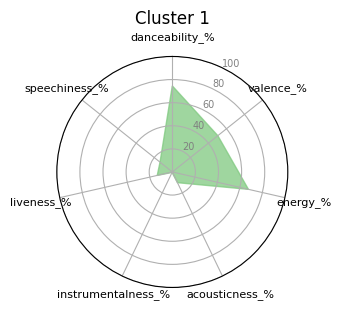

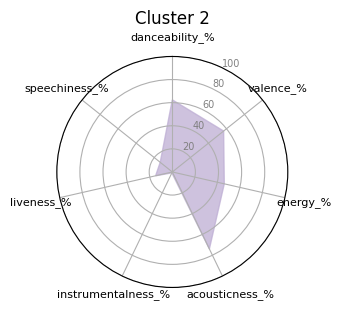

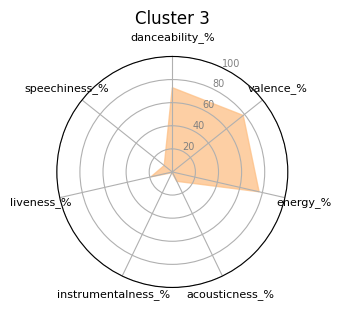

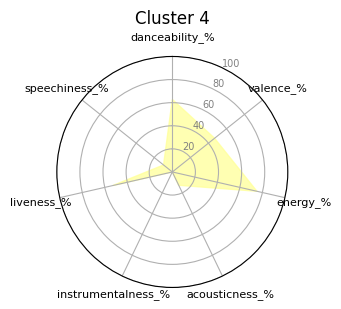

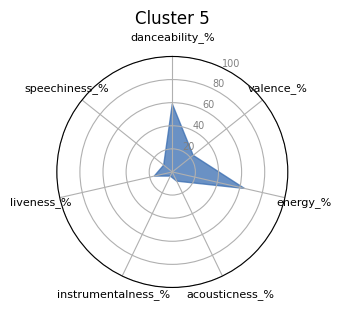

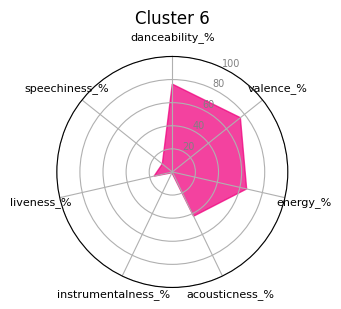

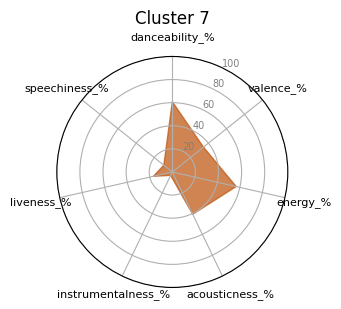

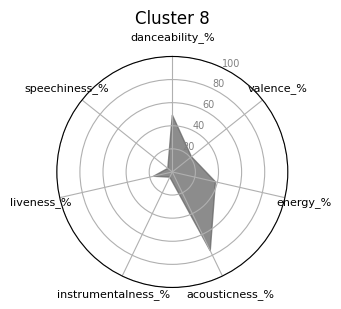

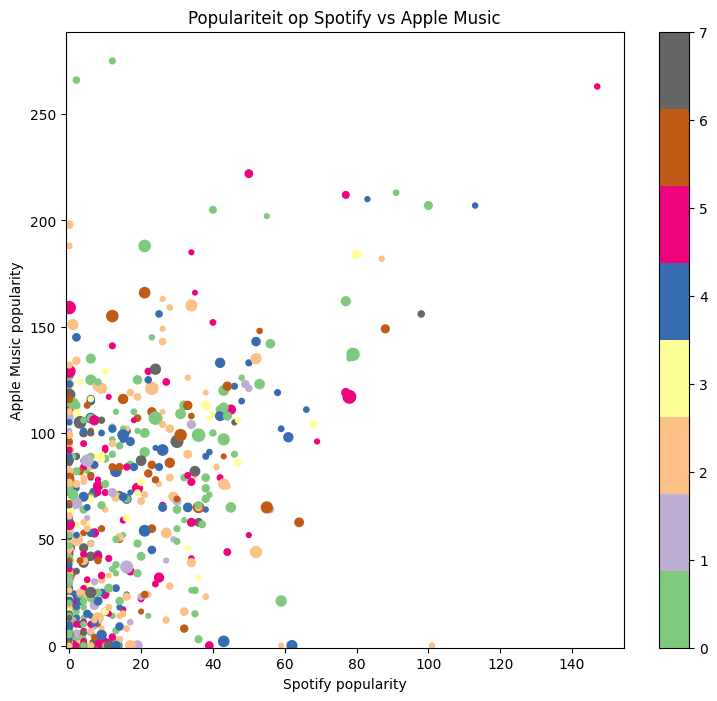

In [34]:
# scatterplot of the popularity of a song on spotify (in_spotify_charts) vs the popularity of an artist on apple music (in_apple_charts)
# I want the size of the dots to be the scaled number of streams

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler(feature_range=(10, 100))

# Fit the scaler and transform the 'streams' column
dataset['scaled_streams'] = scaler.fit_transform(dataset[['streams']])

# I want the color of the dots to be the general type of song
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = dataset[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

kmeans = KMeans(n_clusters=8)
kmeans.fit(features)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)

print(centroids_df)

num_vars = len(features.columns)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start to the end.
angles += angles[:1]

cmap = plt.get_cmap('Accent')

# Helper function to plot each cluster on the radar chart.
def add_to_radar(cluster, color, title):
    values = centroids_df.loc[cluster].tolist()
    values += values[:1]  # repeat the first value to close the circle
    ax = plt.subplot(polar=True)
    ax.fill(angles, values, color=color, alpha=0.75)
    ax.set_title(title)
    return ax

# Add each additional cluster to the chart.
for i in range(kmeans.n_clusters):
    plt.figure(figsize=(3, 3))
    color = cmap(i / kmeans.n_clusters)  # Get color from color map
    ax = add_to_radar(i, color, f'Cluster {i+1}')

# Labels for the plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], features.columns, fontsize=8)
    ax.set_rlabel_position(180 / num_vars)
    plt.yticks(np.arange(20, 101, 20), ['20', '40', '60', '80', '100'], color="grey", size=7)
    plt.ylim(0, 100)

    plt.show()


dataset['cluster'] = kmeans.labels_

plt.figure(figsize=(9,8))
plt.scatter(dataset['in_spotify_charts'], dataset['in_apple_charts'], s=dataset['scaled_streams'], c=dataset['cluster'], cmap='Accent')
plt.colorbar()

plt.xlabel('Spotify popularity')
plt.ylabel('Apple Music popularity')
plt.title('Populariteit op Spotify vs Apple Music')

plt.xlim(left=-1)
plt.ylim(bottom=-1)

plt.show()

While the popularity of songs on spotify and apple music is correlated, it is not a 1-to-1 relationship. Different songs have a different popularity on different platforms but it isn't clear wether that expands to different genres.